In [1]:
import json
import matplotlib.pyplot as plt

hashtag = 'challenge'

data_path = f"../data/hashtags/vertices/{hashtag}.json"

with open(data_path, 'r') as f:
    data = json.load(f)

time_difference_list = []

# Load original video information (assuming `data` is a dictionary with the original videos)
original_videos = data

# Load stitched video information from JSON file
with open(f"../data/hashtags/vertices/targets/{hashtag}.json", "r") as f:
    stitched_videos = json.load(f)

# Calculate time difference
for original_id, original_data in original_videos.items():
    stitched_id = original_data.get('stitches')
    
    # Find the stitched video by ID
    stitched_video = next((video for video in stitched_videos if video['id'] == stitched_id), None)
    
    if stitched_video:
        time_difference = original_data['create_time'] - stitched_video['create_time']
        #print(f"Time difference between original video {original_id} and stitched video {stitched_id}: {time_difference} seconds")
        time_difference_list.append(time_difference)
    #else:
        #print(f"Stitched video with ID {stitched_id} not found for original video {original_id}")


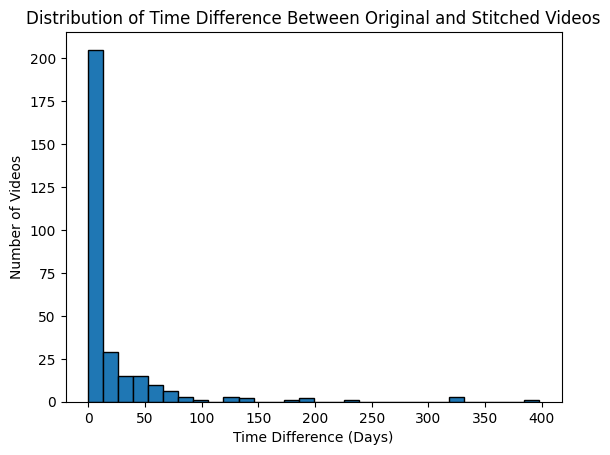

In [2]:
#plot the time differences as days, y axis is percentage of videos, one bar for each day
time_difference_days = [i / 86400 for i in time_difference_list]

plt.hist(time_difference_days, bins=30, edgecolor='black')
plt.xlabel("Time Difference (Days)")
plt.ylabel("Number of Videos")
plt.title("Distribution of Time Difference Between Original and Stitched Videos")
plt.show()

In [3]:
#percentage within 30 days
within_30_days = len([i for i in time_difference_days if i <= 30]) / len(time_difference_days)
print(f"Percentage of videos stitched within 30 days: {within_30_days * 100:.2f}%")


Percentage of videos stitched within 30 days: 81.14%


In [4]:
#create list with the percentage of videos stitched within 30 days for each hashtag
hashtags = ["abortion", "anime", "asmr", "biden2024", "blacklivesmatter", "booktok", "catsoftiktok", "challenge", "climatechange", "comedy", "conspiracy", "dogsoftiktok", "election", "football", "gaza", "guncontrol", "gym", "israel", "jazz", "kpop", "learnontiktok", "lgbt", "maga", "makeup", "minecraft", "movie", "news", "palestine", "plantsoftiktok", "prochoice", "science", "storytime", "tiktoknews", "trump2024", "watermelon"]

percentage_list = []

for hashtag in hashtags:
    time_difference_list = []

    # Load original video information (assuming `data` is a dictionary with the original videos)
    data_path = f"../data/hashtags/vertices/{hashtag}.json"
    with open(data_path, 'r') as f:
        data = json.load(f)
    original_videos = data

    # Load stitched video information from JSON file
    with open(f"../data/hashtags/vertices/targets/{hashtag}.json", "r") as f:
        stitched_videos = json.load(f)

    # Calculate time difference
    for original_id, original_data in original_videos.items():
        stitched_id = original_data.get('stitches')
        
        # Find the stitched video by ID
        stitched_video = next((video for video in stitched_videos if video['id'] == stitched_id), None)
        
        if stitched_video:
            time_difference = original_data['create_time'] - stitched_video['create_time']
            #print(f"Time difference between original video {original_id} and stitched video {stitched_id}: {time_difference} seconds")
            time_difference_list.append(time_difference)    
    # Calculate percentage within 30 days
    time_difference_days = [i / 86400 for i in time_difference_list]
    within_30_days = len([i for i in time_difference_days if i <= 30]) / len(time_difference_days) if time_difference_days else 0
    percentage_list.append(within_30_days * 100)


In [5]:
percentage_list

[83.78378378378379,
 79.22948073701842,
 71.26436781609196,
 92.24137931034483,
 87.61467889908256,
 80.77849117174961,
 79.96575342465754,
 81.14478114478115,
 80.48780487804879,
 79.86641221374046,
 85.88235294117646,
 75.25562372188139,
 88.75739644970415,
 89.32203389830508,
 88.12351543942994,
 66.66666666666666,
 73.69727047146401,
 84.13173652694611,
 73.33333333333333,
 85.73508005822417,
 65.92797783933518,
 81.33616118769883,
 94.04517453798768,
 76.32850241545893,
 87.95180722891565,
 80.21680216802169,
 90.1639344262295,
 87.94435857805254,
 59.70149253731343,
 90.0,
 79.7979797979798,
 81.95121951219512,
 72.3076923076923,
 91.11617312072893,
 89.6103896103896]

In [6]:
percentage_list.sort()

In [7]:
percentage_list

[59.70149253731343,
 65.92797783933518,
 66.66666666666666,
 71.26436781609196,
 72.3076923076923,
 73.33333333333333,
 73.69727047146401,
 75.25562372188139,
 76.32850241545893,
 79.22948073701842,
 79.7979797979798,
 79.86641221374046,
 79.96575342465754,
 80.21680216802169,
 80.48780487804879,
 80.77849117174961,
 81.14478114478115,
 81.33616118769883,
 81.95121951219512,
 83.78378378378379,
 84.13173652694611,
 85.73508005822417,
 85.88235294117646,
 87.61467889908256,
 87.94435857805254,
 87.95180722891565,
 88.12351543942994,
 88.75739644970415,
 89.32203389830508,
 89.6103896103896,
 90.0,
 90.1639344262295,
 91.11617312072893,
 92.24137931034483,
 94.04517453798768]

In [8]:
#average of percentages
average = sum(percentage_list) / len(percentage_list)

In [9]:
average

81.59090309012656

In [10]:
#percentage within 1 days
within_1_day = len([i for i in time_difference_days if i <= 1]) / len(time_difference_days)
print(f"Percentage of videos stitched within 1 day: {within_1_day * 100:.2f}%")


Percentage of videos stitched within 1 day: 38.96%


In [11]:
#create list with the percentage of videos stitched within 30 days for each hashtag
hashtags = ["abortion", "anime", "asmr", "biden2024", "blacklivesmatter", "booktok", "catsoftiktok", "challenge", "climatechange", "comedy", "conspiracy", "dogsoftiktok", "election", "football", "gaza", "guncontrol", "gym", "israel", "jazz", "kpop", "learnontiktok", "lgbt", "maga", "makeup", "minecraft", "movie", "news", "palestine", "plantsoftiktok", "prochoice", "science", "storytime", "tiktoknews", "trump2024", "watermelon"]

percentage_list = []

for hashtag in hashtags:
    time_difference_list = []

    # Load original video information (assuming `data` is a dictionary with the original videos)
    data_path = f"../data/hashtags/vertices/{hashtag}.json"
    with open(data_path, 'r') as f:
        data = json.load(f)
    original_videos = data

    # Load stitched video information from JSON file
    with open(f"../data/hashtags/vertices/targets/{hashtag}.json", "r") as f:
        stitched_videos = json.load(f)

    # Calculate time difference
    for original_id, original_data in original_videos.items():
        stitched_id = original_data.get('stitches')
        
        # Find the stitched video by ID
        stitched_video = next((video for video in stitched_videos if video['id'] == stitched_id), None)
        
        if stitched_video:
            time_difference = original_data['create_time'] - stitched_video['create_time']
            #print(f"Time difference between original video {original_id} and stitched video {stitched_id}: {time_difference} seconds")
            time_difference_list.append(time_difference)    
    # Calculate percentage within 1 days
    time_difference_days = [i / 86400 for i in time_difference_list]
    within_1_day = len([i for i in time_difference_days if i <= 1]) / len(time_difference_days) if time_difference_days else 0
    percentage_list.append(within_1_day * 100)


In [12]:
percentage_list.sort()
percentage_list

[14.897260273972604,
 16.7479674796748,
 18.340611353711793,
 18.559556786703602,
 18.609406952965234,
 19.402985074626866,
 20.0,
 21.660305343511453,
 21.73913043478261,
 23.325062034739457,
 23.860021208907742,
 24.137931034482758,
 24.932249322493224,
 26.80577849117175,
 26.82926829268293,
 27.30318257956449,
 27.609427609427613,
 27.692307692307693,
 29.797979797979796,
 30.0,
 30.120481927710845,
 31.65137614678899,
 33.33333333333333,
 35.62874251497006,
 38.02163833075734,
 38.961038961038966,
 40.61757719714964,
 41.17647058823529,
 42.60355029585799,
 45.42372881355932,
 45.49180327868852,
 48.51936218678816,
 50.86206896551724,
 51.35135135135135,
 53.38809034907598]

In [13]:
average = sum(percentage_list) / len(percentage_list)

In [14]:
average

31.125744171557983